# Wizualizacja i przygotowanie danych

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 28.7 MB/s eta 0:00:00
     ---------------------------------------- 219.8/219.8 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 55.6 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("churn.txt")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Zadanie 1. (1 pkt)
> Zbadaj korelację pomiędzy zmiennymi *Day Mins* i *Day Calls* a zmienną *Day Charge* przy pomocy wykresów punktowych.
>
> Czy istnieje jakaś zależność? Jeśli tak, to jaka? Dlaczego jest lub jej nie ma? Co o tym sądzisz?

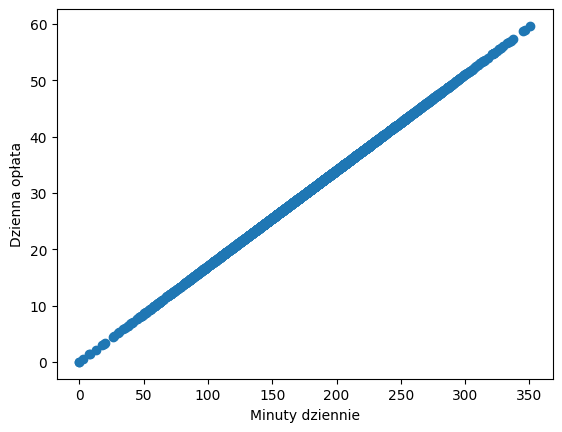

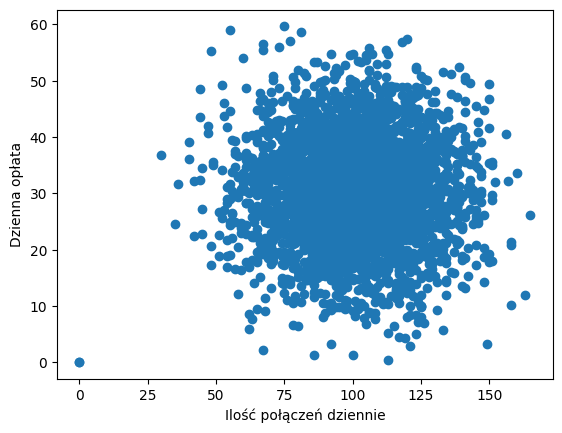

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Day Mins'],df['Day Charge'])
plt.xlabel('Minuty dziennie')
plt.ylabel('Dzienna opłata')
plt.show()

fig_2 = plt.figure()
bx = fig_2.add_subplot(1,1,1)
bx.scatter(df['Day Calls'],df['Day Charge'])
plt.xlabel('Ilość połączeń dziennie')
plt.ylabel('Dzienna opłata')
plt.show()

Czy istnieje jakaś zależność? 
Tak.

Jeśli tak, to jaka? 
Dzienna opłata ma zależność liniową od minut dziennie (im dłużej trwa połączenie, tym więcej płacimy). Korelacja dodatnia.

Dlaczego jest lub jej nie ma?
Korelacja jest, ponieważ jedna cecha jest zależna od drugiej.

Co o tym sądzisz?
Jest to naturalne dzialanie operatorow. Dodatkowo ilość połączeń dziennie nie ma wpływu na wysokość dziennej opłaty (dla np. 100 połączeń dziennie mamy tą samą opłatę).

### Zadanie 2. (1 pkt)
> Zbadaj, czy istnieją punkty oddalone dla zmiennych *Account Length* i *Day Charge*. Jeśli istnieją, to co można z nimi zrobić? Które rozwiązanie według Ciebie jest w tym przypadku najlepsze? Dlaczego?
>
> Wykorzystaj w zadaniu histogram i wykres pudełkowy.

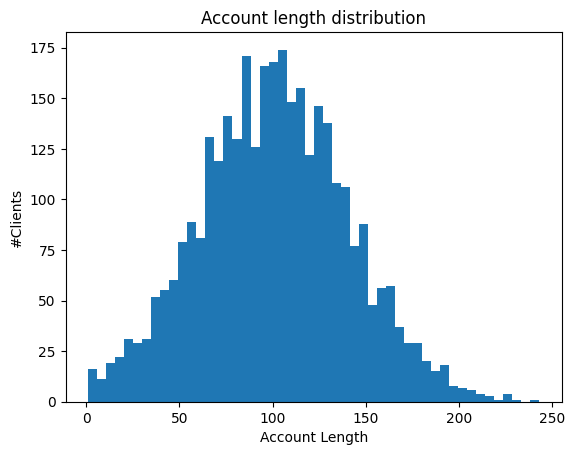

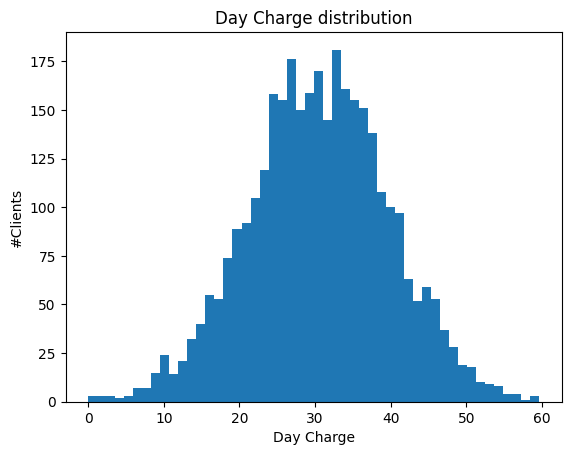

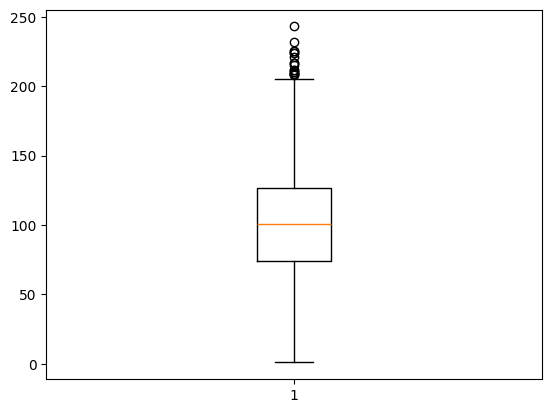

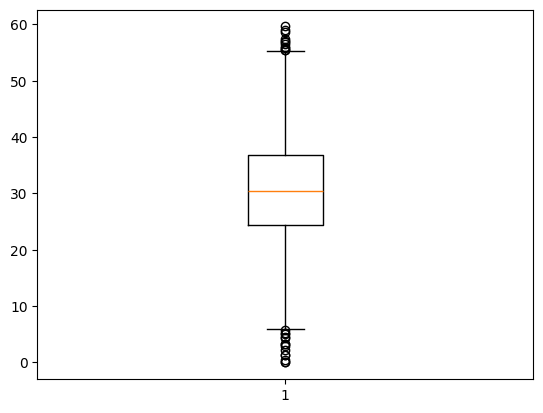

In [18]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
# Zmienna
plt.hist(df['Account Length'],bins = 50)
# Etykiety i nagłówek
plt.title('Account length distribution')
plt.xlabel('Account Length')
plt.ylabel('#Clients')
plt.show()


fig_2=plt.figure()
ax = fig_2.add_subplot(1,1,1)
# Zmienna
plt.hist(df['Day Charge'],bins = 50)
# Etykiety i nagłówek
plt.title('Day Charge distribution')
plt.xlabel('Day Charge')
plt.ylabel('#Clients')
plt.show()


fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(df['Account Length'])
plt.show()

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(df['Day Charge'])
plt.show()

Jak widać (najlepiej na wykresach pudełkowych) mamy dużo punktów oddalonych.
Są to punkty poza "wąsami" wykresów pudełkowych oraz podwyższony ogon histogramu.

Punkty oddalone, czy tzw. "outliery" można wykryć, a następnie usunąć, tak aby nie "psuły" wariancji danych. Jeśli mamy mało danych (według mnie - nie tutaj) to można spróbować stworzyć osobne zbiory tylko na punkty oddalone.

### Zadanie 3. (1 pkt)
> Wykonaj normalizację **Min-Max** na zmiennej *Day Mins* i dodaj ją do DataFrame. Czy po normalizacji występuje korelacja ze zmienną *Day Charge*? Dlaczego? Co o tym sądzisz?
>
> **Wskazówka:** Skorzystaj z operacji na tablicach i funkcji, jakie oferuje biblioteka NumPy.

Przed:  0       265.1
1       161.6
2       243.4
3       299.4
4       166.7
5       223.4
6       218.2
7 
Po:  0       0.755701
1       0.460661
2       0.693843
3       0.853478
4       0.475200
5       0.63683


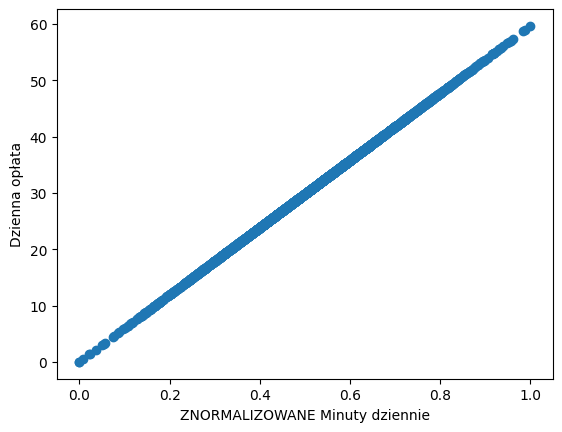

In [30]:
dm = df["Day Mins"] 
normalized_dm = (dm-np.min(dm))/(np.max(dm)-np.min(dm)) 

print("Przed: ", df["Day Mins"].to_string()[:100])
print("Po: ", normalized_dm.to_string()[:100])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(normalized_dm,df['Day Charge'])
plt.xlabel('ZNORMALIZOWANE Minuty dziennie')
plt.ylabel('Dzienna opłata')
plt.show()

Czy po normalizacji występuje korelacja ze zmienną *Day Charge*? Tak.
Dlaczego? To tylko przeskalowanie wartości.
Co o tym sądzisz? Jest to naturalne zjawisko. NA logikę - dzienna opłata nadal będzie podobnie się zachowywać, nawet jeśli będziemy rozmawiać o sekundach, a nie minutach połączenia dziennia.